# Homework 5: Web Mining

Name: Jordan Pinkava

Course: BMGT404

Section: 0201

Date: 04/25/2024

My new analyst position at TerpBank, a small brokerage firm, gives me the oppourtunity to work with stocks and analyze the market on a daily basis. In this position, I have some lovely clients whom I get to help build their stock portfolios. Currently, I am trying to help a specific client with their stock portfolio and to help them get a better understanding of where they are investing their money. In doing so, it is also important to keep in mind that I will have many clients, and so will my co-workers, who encounter similar questions and issues. The code below attempts to be stock and stock portfolio analysis, all with code that can be reused for future clients! Therefore, I want to make this some of my cleanest code, as I know I will be using it again in the future. 

First things first, lets load in the necessary libraries for this stock portfolio analysis. We will use re, pandas, BeautifulSoup, requests, plotly, matplotlib, seaborn, and numpy!

In [1]:
import re
import pandas as pd
from bs4 import BeautifulSoup
import requests
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

I want to start by creating a function that will read in the stock page that I am intersted in. This function relies on the analysis being through the Wall Street Journal stock page, which is what we use at TerpBank. From here, we want to grab the dataframe on the stock webpage, which has relevant information regarding the past 5 years for that particular stock. By doing this, we have a nicely formatted pandas dataframe that we can do our data analysis with, rather than manually parsing through the stock pages (and wasting our time!). 

In [2]:
#create a function called stock_data that creates a dataframe of our stock data from the past 5 years
def stock_data(stock):
    #takes WSJ url
    stock_url = 'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/'+str(stock)+'.html'
    stock_page = requests.get(stock_url)
    stock_page_soup = BeautifulSoup(stock_page.text, 'html.parser')
    #reads in the table on the webpage
    table = stock_page_soup.find_all('table', class_ = "cr_dataTable")
    #formats the table
    df = pd.read_html(str(table), index_col=0)[0]
    df.dropna(how="all", axis = 0, inplace = True)
    df.dropna(how="all", axis = 1, inplace = True)
    return df

From here, I want to create a variable for a dataframe for each one of my clients stocks in the portfolio. This allows for easy access to any of their stocks data from the data table we create from the function above. 

In [3]:
#create dataframes for function above
microsoft_data = stock_data("MSFT")
apple_data = stock_data("AAPL")
walgreens_data = stock_data("WBA")
target_data = stock_data("TGT")
nike_data = stock_data("NKE")

Over the five years listed in the table, how much sales/revenue a certain stock has made is very important. We are curious on which stocks in the portfolio had the highest sales/revenue over the past five years. To do so, we made a function that grabs the total sales/revenue over the five year listed period. From there, I found the one with the highest sales to help out my customer!

In [5]:
#create a function that calculates the total sales/revenue for a stock portfolio over the past five years
def highest(stock):
    sales = stock.loc["Sales/Revenue"]
    total = sales.astype(int).sum()
    return total

#from here, print out the total sales/revenue over the past 5 years
print(f"Nike Total Sales: ${highest(nike_data)}")
print(f"Apple Total Sales: ${highest(apple_data)}")
print(f"Walgreens Total Sales: ${highest(walgreens_data)}")
print(f"Microsoft Total Sales: ${highest(microsoft_data)}")
print(f"Target Total Sales: ${highest(target_data)}")
print()

#find the stock with the highest sales/revenue from the past 5 years
print(f"Based on the data above, Apple had the highest total sales/revenue of ${highest(apple_data)} in millions of US dollars.")

Nike Total Sales: $219018
Apple Total Sales: $1677548
Walgreens Total Sales: $663141
Microsoft Total Sales: $846790
Target Total Sales: $462154

Based on the data above, Apple had the highest total sales/revenue of $1677548 in millions of US dollars.


It is important for any analyst to be able to visualize the data they are working with. I want to create a visualization for my client and myself to see the stock's sales growth (in total) over the past 5 years. Below, I created a function to grab that row of data, clean the data for each of the past five years, and then add all of those percentages together to see the total sales growth in percentage. 

In [6]:
#create function sales growth, which finds the total sales growth over the past five years
def sales_growth(stock):
    clean_stock = stock.replace("-", "0")
    sales_growth = clean_stock.loc["Sales Growth"]
    #for each year, clean the data and make a variable for it
    perc23 = sales_growth[0]
    perc_23 = perc23.replace("%", "")
    perc22 = sales_growth[1]
    perc_22 = perc22.replace("%", "")
    perc21 = sales_growth[2]
    perc_21 = perc21.replace("%", "")
    perc20 = sales_growth[3]
    perc_20 = perc20.replace("%", "")
    perc19 = sales_growth[4]
    perc_19 = perc19.replace("%", "")
    #convert percentages to floats so we can add them together
    return float(perc_23) + float(perc_22) + float(perc_21) + float(perc_20) + float(perc_19)

After creating the function above, we can make our visualization! Below, I created a a list of all of the percentages (using the function above!), a list of all the company (stock) names, then began plotting. I used seaborn to make my graph prettier than a basic matplotlib visualization. Further, I changed the colors to be associated with the main colors of each company, so that it is more visually stimulating and readable for anyone who views the graph. Finally, I added annotations so that it is easy to read the percentage growth for each stock.

I decided doing a total sales growth as a bar plot would be better than a side by side barplot for each year/each company because I think the total growth over the years is better seen through a total percentage growth. 

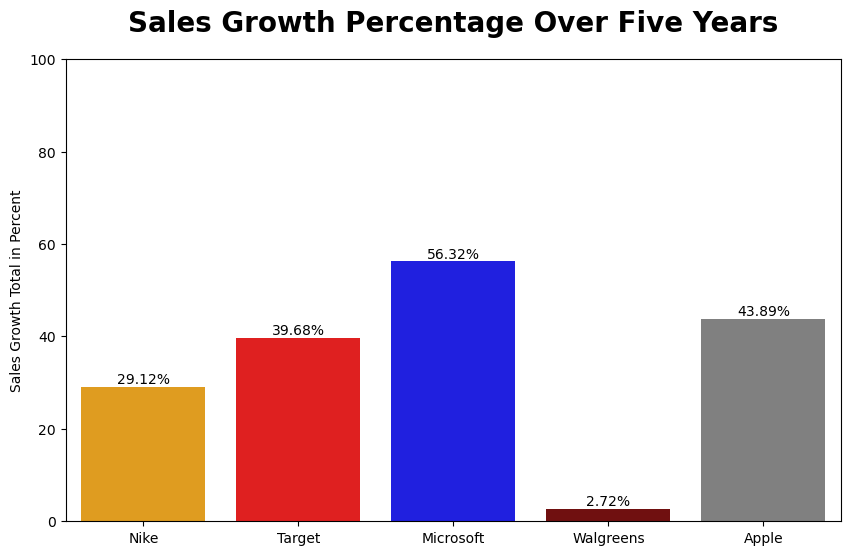

In [7]:
#create a list of the sales growth for each stock
stock_prc_growth = [sales_growth(nike_data), sales_growth(target_data), sales_growth(microsoft_data), sales_growth(walgreens_data), sales_growth(apple_data)]

#create a list of company names to be used in the x-axis
company_names = ["Nike", 'Target', 'Microsoft', 'Walgreens', 'Apple']

#create our plot, uisng seaborn and matplotlib
plt.figure(figsize=(10, 6))
axis = sns.barplot(x=company_names, y=stock_prc_growth, palette=["Orange", "Red", "Blue", "Maroon", "Gray"])

axis.set_title('Sales Growth Percentage Over Five Years', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'black'}, pad=20) 
axis.set_ylim([0,100])
plt.ylabel('Sales Growth Total in Percent')

#annotate the top of each bar to have the percentage for each stock
for p in axis.patches:
    height = p.get_height()
    axis.annotate(f'{height:.2f}%',xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

Based on the visualization above, I would highly recommend new clients to purchase stock for Microsoft. Microsoft is a powerful company, and that reflects strongly in their stock growth, as seen with a 56.32% growth over the past 5 years. As a second recommendation, I would suggest Apple, which of course is a close competitor to Microsoft for some technology. Apple is second in terms of sales growth over the past five years, with a 43.89% growth over the past five years, but an overall strong growth is seen. 

# Stock Portfolio Analysis

To better understand my client's portfolio, I want to know how they are doing at the end of each day. The stock market closes at 4pm daily, and the closing price is listed on the WSJ website for us. To see how my client is doing overall, we can create a function that grabs the closing time for any stock in the portfolio, and simply from there we can add all the closing prices together to see the total value of the client's portfolio at the end of the day!

In [8]:
#define a function to get the stock closing price
def stock_close(stock):
    stock_url = 'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/'+str(stock)+'.html'
    stock_page = requests.get(stock_url)
    stock_page_soup = BeautifulSoup(stock_page.text, 'html.parser')
    closing_time = stock_page_soup.find('span', class_ = "cr_num cr_curr_price").text
    closing_time = closing_time.replace("$", "")
    return float(closing_time)

#create a variable for all stock closing prices
wba_close = stock_close("WBA")
msft_close = stock_close("MSFT")
aapl_close = stock_close("AAPL")
tgt_close = stock_close("TGT")
nke_close = stock_close("NKE")

#add those prices together to get the total value of the clients portfolio after the 4pm close.
total_value = wba_close + msft_close + aapl_close + tgt_close + nke_close
print(f"The total value of the clients portfolio at 4pm close was ${total_value}")

The total value of the clients portfolio at 4pm close was $841.5


Further, we also want to see if our client is doing well after hours. Specifically, we want to see if there is any decrease in the clients portfolio when the stock market is not open. We can grab the portfolio percent change pre-market to see if the percentage is positive or negative, which helps indicate if the stock is seeing an increase or decrease when the market's closed.  

In [11]:
#create a function that looks at the percentage change when the market is closed
def stock_decrease(stock):
    stock_url = 'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/'+str(stock)+'.html'
    stock_page = requests.get(stock_url)
    stock_page_soup = BeautifulSoup(stock_page.text, 'html.parser')
    closing_time = stock_page_soup.find('span', class_ = "cr_num diff_percent").text
    closing_time = closing_time.replace("%", "")
    return float(closing_time)

#create variables for all of the stock decrease values
nke_dec = stock_decrease('NKE')
tgt_dec = stock_decrease('TGT')
wba_dec = stock_decrease('WBA')
msft_dec = stock_decrease('MSFT')
aapl_dec = stock_decrease('AAPL')

#dd these values to a list so we can iterate through them
stock_decreases = [nke_dec, wba_dec, msft_dec, aapl_dec, tgt_dec]
amount_decreases = 0
#this counts the amount of stocks our clients portfolio sees a decrease in while the market is closed
for stock in stock_decreases:
    if stock < 0:
        amount_decreases +=1
        
print(f"The amount of stocks that saw a decrease in value in the client's portfolio was {amount_decreases} stock.")

The amount of stocks that saw a decrease in value in the client's portfolio was 1 stock.


Finally, we want to understand the clients portfolio on a yearly spread. The amount a stock fluctuates on 52 week basis is really significant when building a portfolio that meets the client's needs. To understand this, I created a function that gets the 52 week range for the stock, then I clean it up so I can find the difference (the flucuation) that the stock experienced over the 52 week change. 

In [18]:
#find the 52 week change for each stock using the following function
def stock_flux(stock):
    stock_url = 'https://bmgt402.rhsmith.umd.edu/~jbono/bmgt404/homework5/'+str(stock)+'.html'
    stock_page = requests.get(stock_url)
    stock_page_soup = BeautifulSoup(stock_page.text, 'html.parser')
    closing_time = stock_page_soup.find_all('span', class_ = "data_data")
    fifty_two = closing_time[4]
    return fifty_two.text

#make a function (using the one above as well) that cleans the string, changes it to a list, then helps us find the difference in the 52 week change
def flux(stock):
    flux = stock_flux(stock)
    clean_flux = flux.strip().split("-")
    flux_amount = abs(float(clean_flux[0]) - float(clean_flux[1]))
    return flux_amount

Below, we take the data from above to get the stock that had the most fluctuation in the 52 week period.

In [20]:
#print the fluctuations for each stock in the portfolio
print(f"Nike fluctuation: ${flux('NKE'):.2f}")
print(f"Apple fluctuation: ${flux('AAPL'):.2f}")
print(f"Walgreens fluctuation: ${flux('WBA'):.2f}")
print(f"Microsoft fluctuation: ${flux('MSFT'):.2f}")
print(f"Target fluctuation: ${flux('TGT'):.2f}")
print()

#find the stock with the highest fluctuation over the 52 week period
print(f"Based on the data above, Microsoft had the highest 52-week fluctuation of ${flux('MSFT'):.2f}")

Nike fluctuation: $42.65
Apple fluctuation: $68.18
Walgreens fluctuation: $18.27
Microsoft fluctuation: $153.62
Target fluctuation: $78.77

Based on the data above, Microsoft had the highest 52-week fluctuation of $153.62


In doing this analysis, the big takeaway is the fact that this code is re-usable, for both myself and my coworkers who face similar issues. The code is meant to be used for any clients portfolio, and much of the code can be updated to fit the needs and wants of the client as well. This is extremely pivitol to my new analyst role at TerpBank, and from this task, it already seems that I am making a big impact for myself, my company, and most importantly, my clients. 

"I pledge on my honor that I have not given nor received any unauthorized
assistance on this assignment."
--Jordan Pinkava